# LABORATORIO 1

Integrantes: Elisa Parga, Simon Repolt

Profesor: Claudio Pérez

Auxiliar: Juan Pérez

In [1]:
#pip install opencv-python
from google.colab.patches import cv2_imshow

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import imutils


# Parte 1

(640, 640, 3)


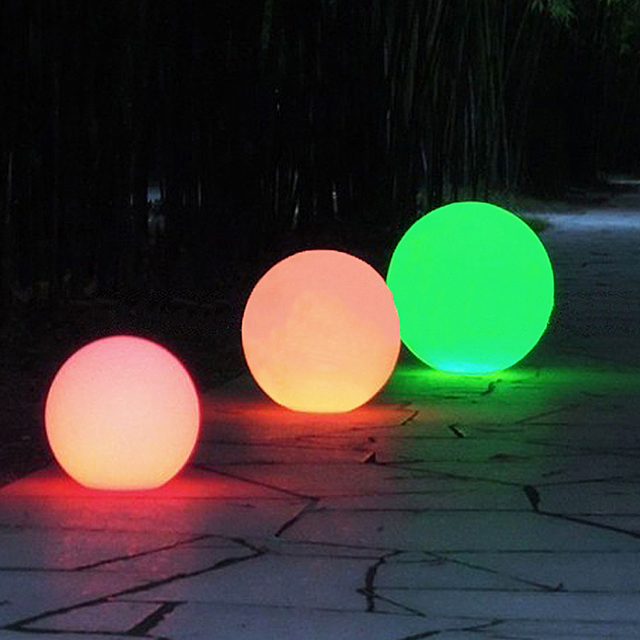

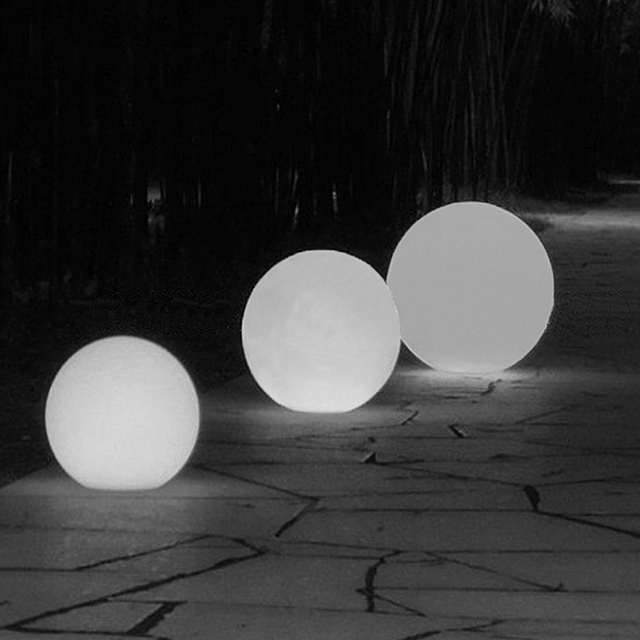

In [3]:
path="/content/images/balls.jpg"

img = cv2.imread(path)
print(img.shape)
cv2_imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

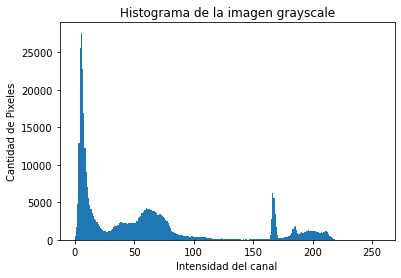

In [4]:
cv2.calcHist(gray, [0], None, [256], [0,256])
plt.hist(gray.ravel(), 256, [0,256])
plt.xlabel("Intensidad del canal")
plt.ylabel("Cantidad de Pixeles")
plt.title("Histograma de la imagen grayscale")
plt.show()



In [5]:
def binimg(img,umbral): #funciona para 1 canal
    var2=img.astype("float64")
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] <= umbral:
                var2[i][j] = 0
            else:
                var2[i][j] = 1
    return var2

Text(0.5, 1.0, 'Umbral = 150')

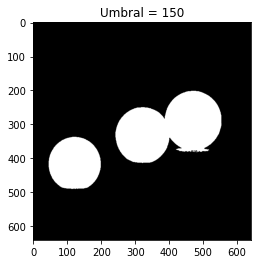

In [6]:
# Umbral = 150
img_150 = binimg(gray,150)
plt.imshow(img_150, cmap='gray')
plt.title("Umbral = 150")

Text(0.5, 1.0, 'Umbral = 100')

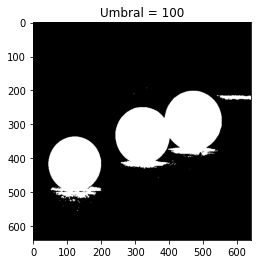

In [7]:
# Umbral = 100
img_100 = binimg(gray,100)
plt.imshow(img_100, cmap='gray')
plt.title("Umbral = 100")

Text(0.5, 1.0, 'Umbral = 50')

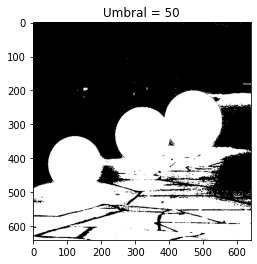

In [8]:
# Umbral = 50
img_50 = binimg(gray,50)
plt.imshow(img_50, cmap='gray')
plt.title("Umbral = 50")

Luego de probar este método con diferentes umbrales, obtenemos que dejando umbral=150 obtenemos los mejores resultados para diferenciar claramente las 3 esferas.

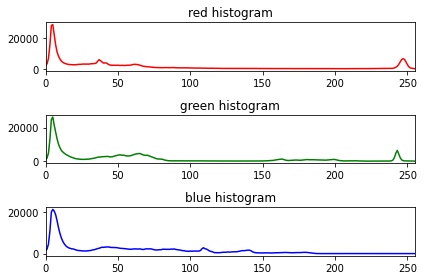

In [36]:
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r,g,b = cv2.split(im_rgb)

red_hist = cv2.calcHist([im_rgb], [0], None, [256], [0, 255])
green_hist = cv2.calcHist([im_rgb], [1], None, [256], [0, 255])
blue_hist = cv2.calcHist([im_rgb], [2], None, [256], [0, 255])

plt.subplot(3, 1, 1)
plt.plot(red_hist, color='r')
plt.xlim([0, 255])
plt.title('red histogram')

plt.subplot(3, 1, 2)
plt.plot(green_hist, color='g')
plt.xlim([0, 255])
plt.title('green histogram')

plt.subplot(3, 1, 3)
plt.plot(blue_hist, color='b')
plt.xlim([0, 255])
plt.title('blue histogram')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Segmentación cuerpo verde')

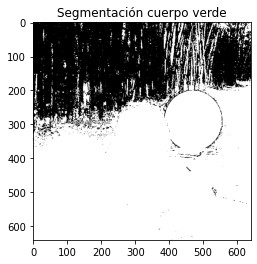

In [37]:
green_seg = binimg(r, 8)
plt.imshow(green_seg, cmap='gray')
plt.title("Segmentación cuerpo verde")

Luego de haber analizado la distribución de intensidades de cada uno de los canales y la composición de toda la imagen se obtiene que filtrando el canal rojo podemos obtener una buena segmentación del cuerpo verde. Esto se debe a que como en la imagen predomina el color rojo, mediante un umbral pequeño la mayor parte de los valores de la imagen serán asignados al límite superior a excepción del cuerpo verde que se "desacopla" del resto.

# Parte 2

Para mejorar el contraste de la imagen, usaremos un estiramiento lineal dado por la siguiente ecuación de la recta:


 $I_0 = \frac{O_{max}-O_{min}}{I_{max}-I_{min}}I_i + (O_{max} - \frac{O_{max}-O_{min}}{I_{max}-I_{min}}I_{max})$

 Donde $I_{max}$ e $I_{min}$ son los valores de intensidad máximos y mínimos observados en el histograma y $O_{max}$ y $O_{min}$ son los valores a los que se desea estirar el contraste.


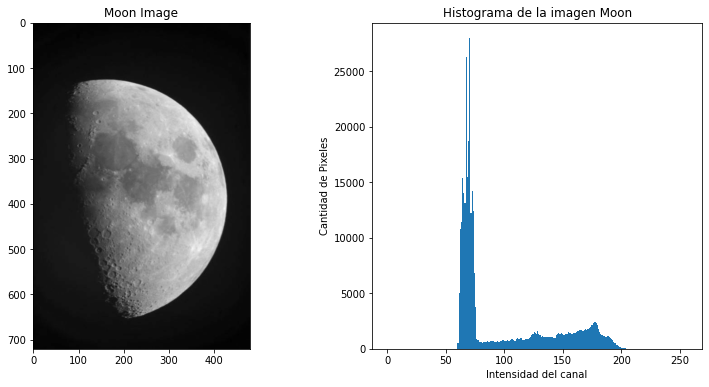

In [56]:
moon = cv2.imread("/content/images/moon.png")
gray_moon = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY)
cv2.calcHist(gray_moon, [0], None, [256], [0,256])

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.imshow(gray_moon, cmap="gray")
plt.title("Moon Image")

plt.subplot(1,2,2)
plt.hist(gray_moon.ravel(), 256, [0,256])
plt.xlabel("Intensidad del canal")
plt.ylabel("Cantidad de Pixeles")
plt.title("Histograma de la imagen Moon")
plt.show()


En este caso notamos que $I_{max} = 200$ y $I_{min} = 60$. Estos puntos serán ampiados a $O_{max} = 250$ y $O_{min} = 0$. Por lo que la transformación de intensidades queda dada por:

$I_0 = 1.78 I_i - 107,14$

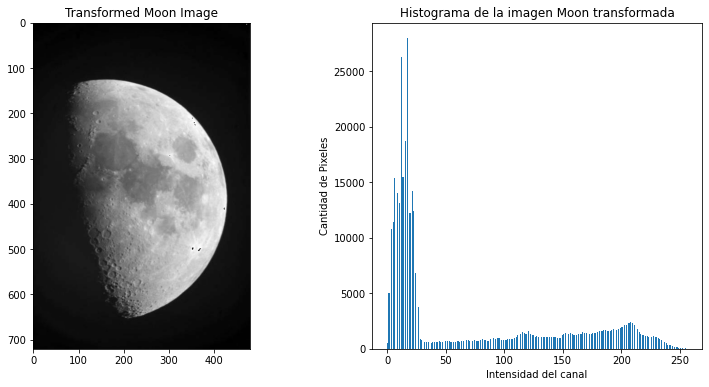

In [58]:
def moon_transformation(img):
  new_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      new_img[i,j] = 1.78*img[i,j] - 107.14
  return new_img

new_moon = moon_transformation(gray_moon)
cv2.calcHist(new_moon, [0], None, [256], [0,256])

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.imshow(new_moon, cmap="gray")
plt.title("Transformed Moon Image")

plt.subplot(1,2,2)
plt.hist(new_moon.ravel(), 256, [0,256])
plt.xlabel("Intensidad del canal")
plt.ylabel("Cantidad de Pixeles")
plt.title("Histograma de la imagen Moon transformada")
plt.show()

Podemos ver que con la transformación aplicada, las intensidades quedan en el rango (0,250) lo que permite ver unos cuantos detalles más en la imagen.

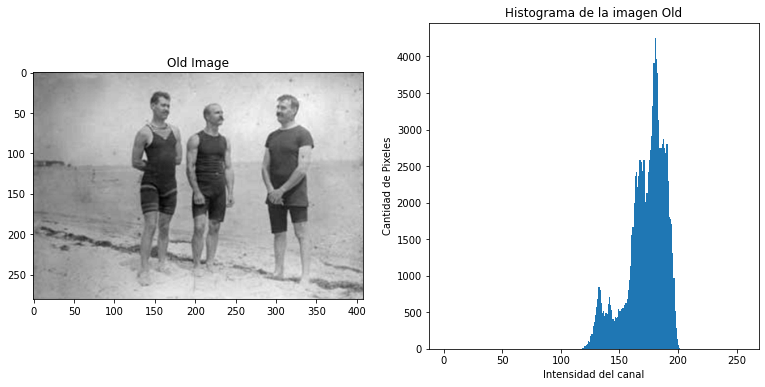

In [59]:
old = cv2.imread("/content/images/old.png")
gray_old = cv2.cvtColor(old, cv2.COLOR_BGR2GRAY)
cv2.calcHist(gray_old, [0], None, [256], [0,256])

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.imshow(gray_old, cmap="gray")
plt.title("Old Image")

plt.subplot(1,2,2)
plt.hist(gray_old.ravel(), 256, [0,256])
plt.xlabel("Intensidad del canal")
plt.ylabel("Cantidad de Pixeles")
plt.title("Histograma de la imagen Old")
plt.show()


En este caso notamos que  $I_{max}=200$  y  $I_{min}=120$. Estos puntos serán ampiados a  Omax=250  y  Omin=0 . Por lo que la transformación de intensidades queda dada por:

$I_0 = 3.125I_i−375$

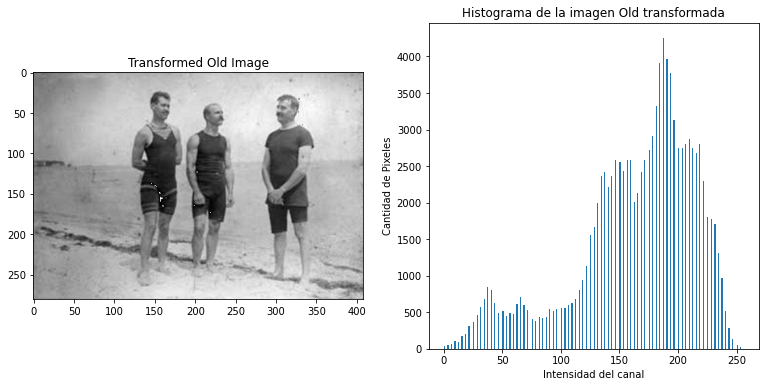

In [61]:
def old_transformation(img):
  new_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      new_img[i,j] = 3.125*img[i,j] - 375
  return new_img

new_old = old_transformation(gray_old)
cv2.calcHist(new_old, [0], None, [256], [0,256])

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.imshow(new_old, cmap="gray")
plt.title("Transformed Old Image")

plt.subplot(1,2,2)
plt.hist(new_old.ravel(), 256, [0,256])
plt.xlabel("Intensidad del canal")
plt.ylabel("Cantidad de Pixeles")
plt.title("Histograma de la imagen Old transformada")
plt.show()

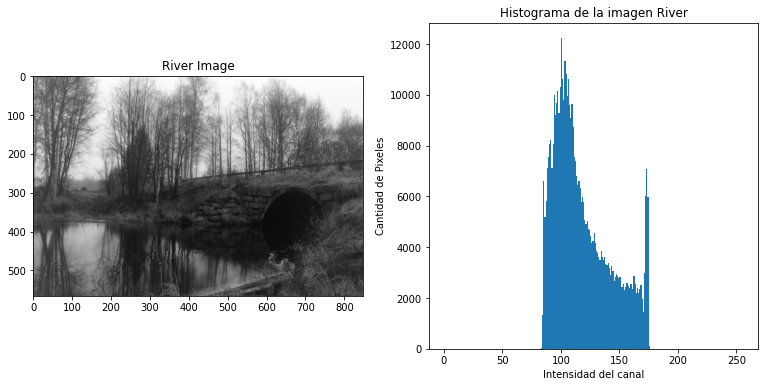

In [62]:
river = cv2.imread("/content/images/river.png")
gray_river = cv2.cvtColor(river, cv2.COLOR_BGR2GRAY)
cv2.calcHist(gray_old, [0], None, [256], [0,256])

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.imshow(gray_river, cmap="gray")
plt.title("River Image")

plt.subplot(1,2,2)
plt.hist(gray_river.ravel(), 256, [0,256])
plt.xlabel("Intensidad del canal")
plt.ylabel("Cantidad de Pixeles")
plt.title("Histograma de la imagen River")
plt.show()

En este caso notamos que  $I_{max}=175$  y  $I_{min}=80$. Estos puntos serán ampiados a  Omax=250  y  Omin=0 . Por lo que la transformación de intensidades queda dada por:

$I_0 = 2.632I_i−210.5$

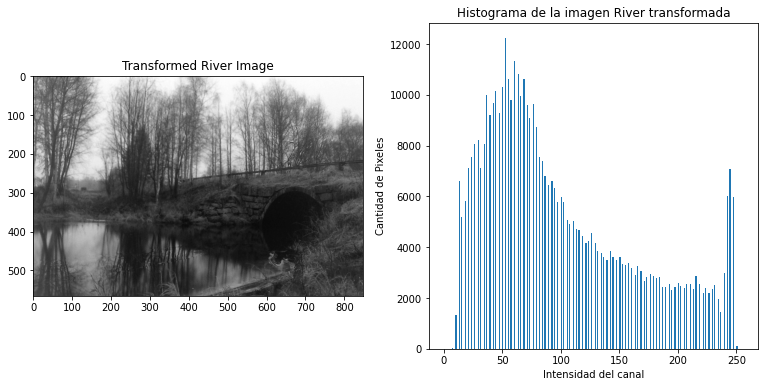

In [65]:
def river_transformation(img):
  new_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      new_img[i,j] = 2.632*img[i,j] - 210.5
  return new_img

new_river = river_transformation(gray_river)
cv2.calcHist(new_river, [0], None, [256], [0,256])

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.imshow(new_river, cmap="gray")
plt.title("Transformed River Image")

plt.subplot(1,2,2)
plt.hist(new_river.ravel(), 256, [0,256])
plt.xlabel("Intensidad del canal")
plt.ylabel("Cantidad de Pixeles")
plt.title("Histograma de la imagen River transformada")
plt.show()

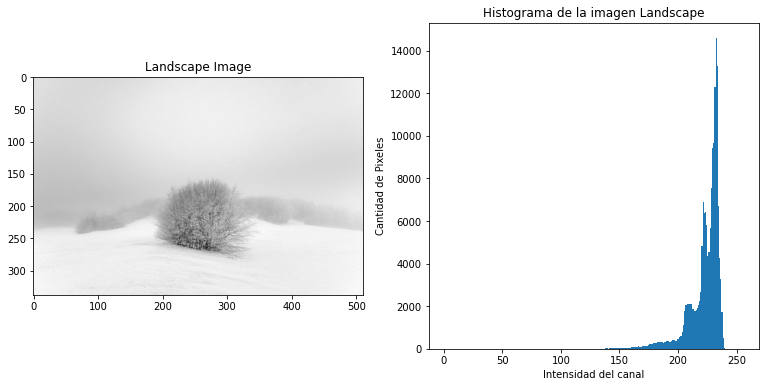

In [66]:
landscape = cv2.imread("/content/images/landscape.jpg")
gray_landscape = cv2.cvtColor(landscape, cv2.COLOR_BGR2GRAY)
cv2.calcHist(gray_landscape, [0], None, [256], [0,256])

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.imshow(gray_landscape, cmap="gray")
plt.title("Landscape Image")

plt.subplot(1,2,2)
plt.hist(gray_landscape.ravel(), 256, [0,256])
plt.xlabel("Intensidad del canal")
plt.ylabel("Cantidad de Pixeles")
plt.title("Histograma de la imagen Landscape")
plt.show()

En este caso notamos que  $I_{max}=240$  y  $I_{min}=160$. Estos puntos serán ampiados a  Omax=250  y  Omin=0 . Por lo que la transformación de intensidades queda dada por:

$I_0 = 3.125I_i−500$

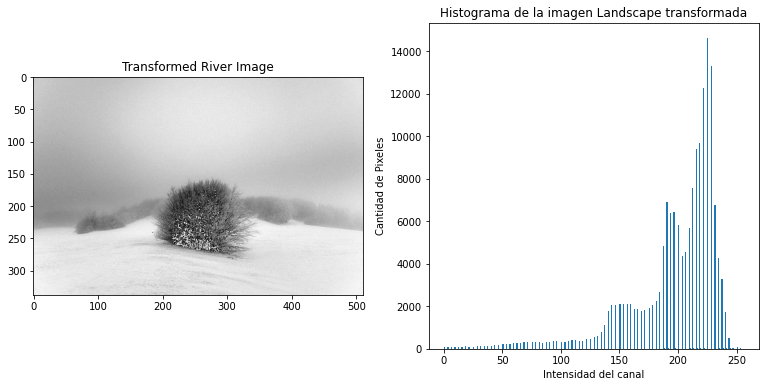

In [67]:
def landscape_transformation(img):
  new_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      new_img[i,j] = 3.125*img[i,j] - 500
  return new_img

new_landscape = landscape_transformation(gray_landscape)
cv2.calcHist(new_landscape, [0], None, [256], [0,256])

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.imshow(new_landscape, cmap="gray")
plt.title("Transformed River Image")

plt.subplot(1,2,2)
plt.hist(new_landscape.ravel(), 256, [0,256])
plt.xlabel("Intensidad del canal")
plt.ylabel("Cantidad de Pixeles")
plt.title("Histograma de la imagen Landscape transformada")
plt.show()

# Parte 3

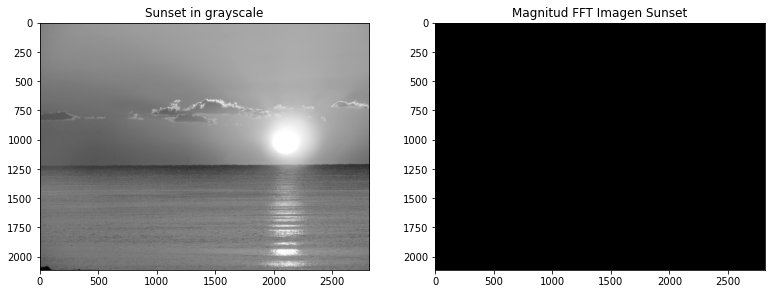

In [76]:
sunset = cv2.imread("/content/images/sunset.jpg")
gray_sunset = cv2.cvtColor(sunset, cv2.COLOR_BGR2GRAY)

def FFT(img):
  fft = np.fft.fft2(img)
  mag_fft = np.abs(fft)
  return mag_fft

mag_fft_sunset = FFT(gray_sunset)

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.imshow(gray_sunset, cmap="gray")
plt.title("Sunset in grayscale")

plt.subplot(1,2,2)
plt.imshow(mag_fft_sunset, cmap="gray")
plt.title("Magnitud FFT Imagen Sunset")
plt.show()

La trasnsformada de Fourier es una herramienta para identificar las frecuencias presentes en una imagen. 

Podemos observar que el resultado de graficar la magnitud de la transformada de Fourier de la imagen *sunset.jpg* es completamente negro. En este caso, el rango de los valores de la intensidad de la imagen de Fourier es demasiado grande para mostrarse en la pantalla, por lo que se genera una imagen completamente negra. Es por esto que se aplicará una transformación logarítmica a la imagen:

Text(0.5, 1.0, 'Transformada logarítmica de la magnitud de la FFT de la imagen sunset')

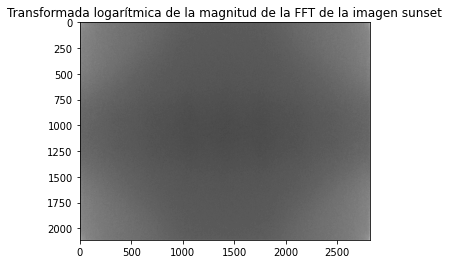

In [85]:
def transformada_logaritmica(fft_img, R=255):
  c = 255/np.log(1+abs(R))
  return c*np.log(1+np.abs(fft_img))

plt.imshow(transformada_logaritmica(mag_fft_sunset, mag_fft_sunset.max()), cmap="gray")
plt.title("Transformada logarítmica de la magnitud de la FFT de la imagen sunset")

Se puede observar en la imagen anterior que con la transformación logarítmica aplicada es posible observar algunas frecuencias presentes en la imagen.

El resultado muestra que la imagen tiene componentes de frecuencias bajas (esquinas) y frecuencias altas (zona interior). Esto se puede deber a las zonas de la imagen donde se producen saltos abruptos de color, como el horizonte y donde se encuentra el sol. Por otro lado, las zonas de frecuencias bajas pueden estar relacionadas con las zonas de la imagen donde no hay muchos cambios de color como el cielo o el mar.

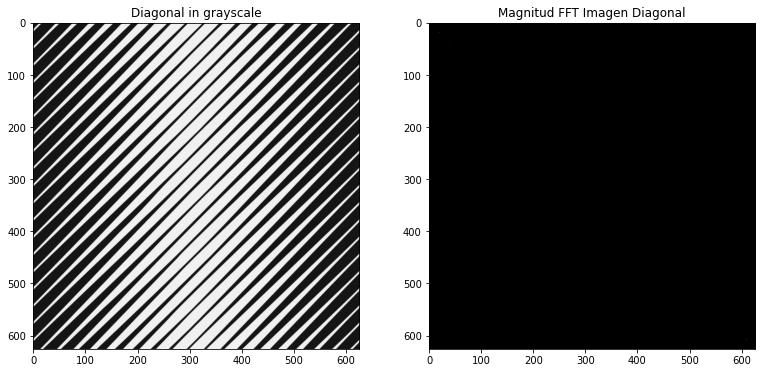

In [86]:
diagonal = cv2.imread("/content/images/diagonal.jpg")
gray_diagonal = cv2.cvtColor(diagonal, cv2.COLOR_BGR2GRAY)

mag_fft_diagonal = FFT(gray_diagonal)

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.imshow(gray_diagonal, cmap="gray")
plt.title("Diagonal in grayscale")

plt.subplot(1,2,2)
plt.imshow(mag_fft_diagonal, cmap="gray")
plt.title("Magnitud FFT Imagen Diagonal")
plt.show()

Text(0.5, 1.0, 'Transformada logarítmica de la magnitud de la FFT de la imagen diagonal')

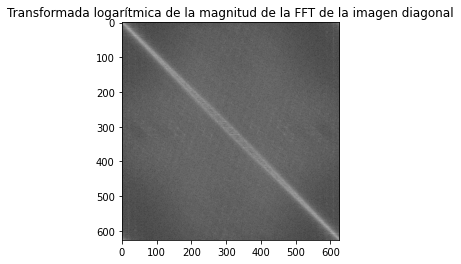

In [87]:
plt.imshow(transformada_logaritmica(mag_fft_diagonal, mag_fft_diagonal.max()), cmap="gray")
plt.title("Transformada logarítmica de la magnitud de la FFT de la imagen diagonal")

Nuevamente se debe aplicar una transformación logarítmica para poder apreciar de mejor manera la magnitud
del espectro de frecuencias.
En el espectro se puede observar que aparece una diagonal que abarca muchas frecuencias.
La razón principal es que una diagonal solo se puede aproximar por los pixeles cuadrados de la imagen, por lo
tanto, se necesitan frecuencias adicionales para componerla. Así, aparecen intensidades de
frencuencia tanto en las zonas de frecuencias altas (centro), como en las de frecuencias bajas (extremos).

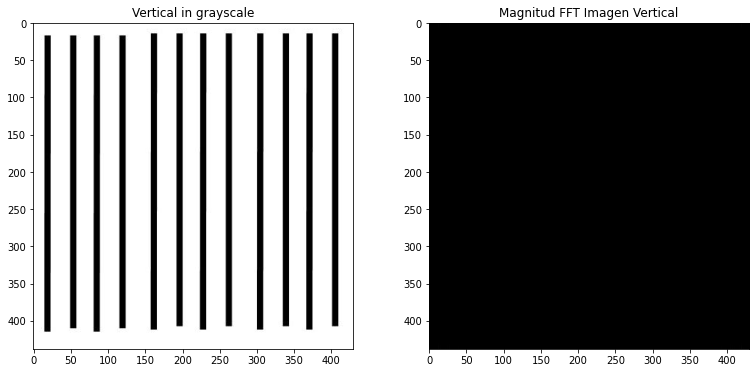

In [88]:
vertical = cv2.imread("/content/images/vertical.jpg")
gray_vertical = cv2.cvtColor(vertical, cv2.COLOR_BGR2GRAY)

mag_fft_vertical = FFT(gray_vertical)

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.imshow(gray_vertical, cmap="gray")
plt.title("Vertical in grayscale")

plt.subplot(1,2,2)
plt.imshow(mag_fft_vertical, cmap="gray")
plt.title("Magnitud FFT Imagen Vertical")
plt.show()

Text(0.5, 1.0, 'Transformada logarítmica de la magnitud de la FFT de la imagen diagonal')

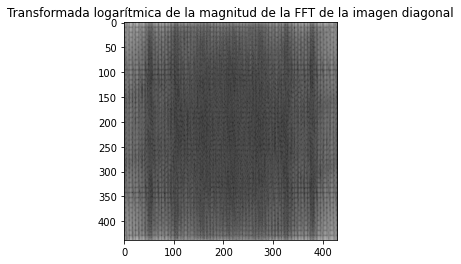

In [89]:
plt.imshow(transformada_logaritmica(mag_fft_vertical, mag_fft_vertical.max()), cmap="gray")
plt.title("Transformada logarítmica de la magnitud de la FFT de la imagen diagonal")

Nuevamente la transformada logarítmica nos permite distinguir con mayor facilidad las frecuencias presentes en la imagen. Esta vez presenta una distribución un poco más uniforme.

# Parte 4

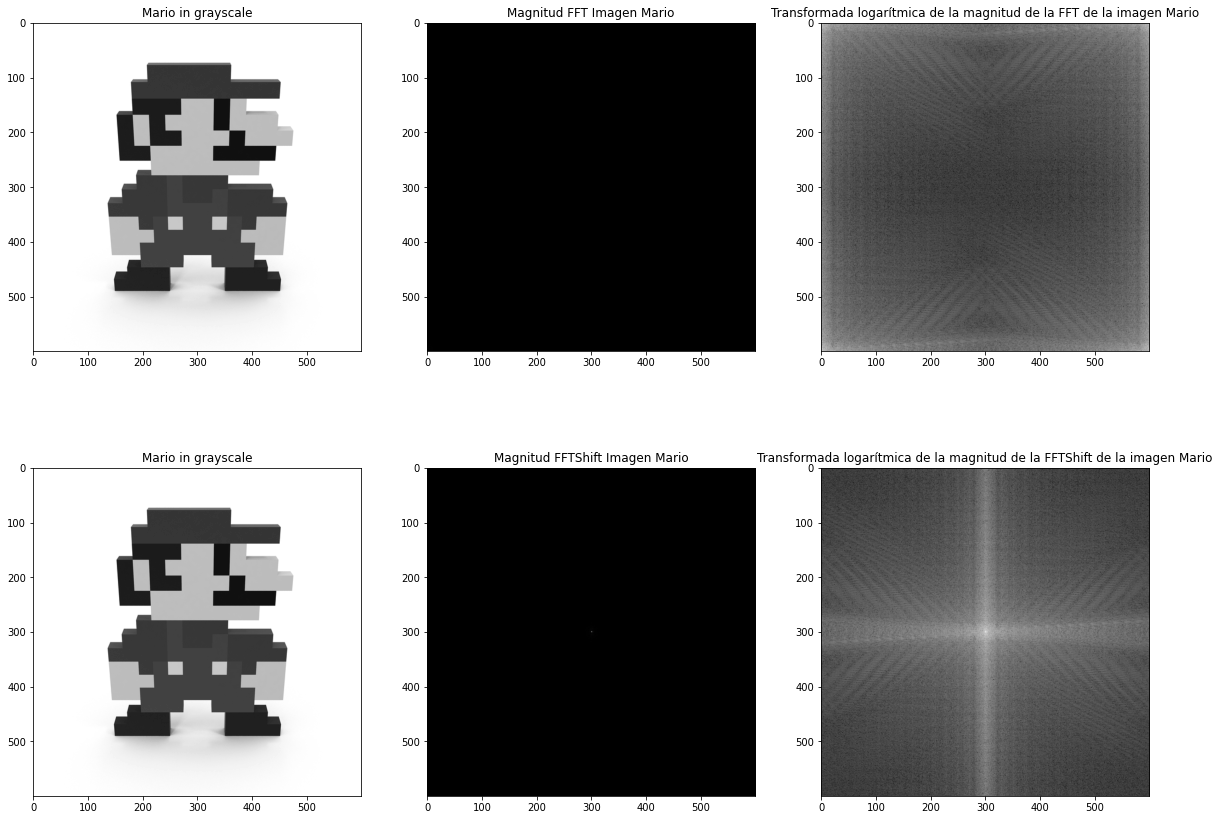

In [104]:
mario = cv2.imread("/content/images/mario.jpg")
gray_mario = cv2.cvtColor(mario, cv2.COLOR_BGR2GRAY)

def FFTShift(img):
  fft_img = FFT(img)
  fft_shift = np.fft.fftshift(fft_img)
  mag_fft_shift = np.abs(fft_shift)
  return mag_fft_shift

mag_fft_mario = FFT(gray_mario)
mag_fft_shift_mario = FFTShift(gray_mario)

def generate_plot(gray_img, mag_fft_img, mag_fft_shift_image, name):
  plt.figure(figsize=(20,15))
  plt.subplot(2,3,1)
  plt.imshow(gray_img, cmap="gray")
  plt.title('{} in grayscale'.format(name))

  plt.subplot(2,3,2)
  plt.imshow(mag_fft_img, cmap="gray")
  plt.title("Magnitud FFT Imagen {}".format(name))

  plt.subplot(2,3,3)
  plt.imshow(transformada_logaritmica(mag_fft_img, mag_fft_img.max()), cmap="gray")
  plt.title("Transformada logarítmica de la magnitud de la FFT de la imagen {}".format(name))

  plt.subplot(2,3,4)
  plt.imshow(gray_img, cmap="gray")
  plt.title("{} in grayscale".format(name))

  plt.subplot(2,3,5)
  plt.imshow(mag_fft_shift_image, cmap="gray")
  plt.title("Magnitud FFTShift Imagen {}".format(name))

  plt.subplot(2,3,6)
  plt.imshow(transformada_logaritmica(mag_fft_shift_image, mag_fft_shift_image.max()), cmap="gray")
  plt.title("Transformada logarítmica de la magnitud de la FFTShift de la imagen {}".format(name))
  plt.show()

generate_plot(gray_mario, mag_fft_mario, mag_fft_shift_mario, "Mario")

Al igual que en la parte 3, si visualizamos la magnitud tras aplicar *FFTShift* a la imagen obtenemos un resultado completamente negro a excepción del pequeño punto blanco al centro de la imagen. Esto se debe a que la función FFTShift permite aplicar fftshift al espectro de la imagen, lo que deplaza la frecuencia
cero (zero-frequency) al centro del espectro.

La mayor diferencia se encuentra al momento de aplicar la transformada logarítmica a esta magnitud. 

Si observamos en primer lugar la transformada logarítmica de la magnitud de la *fft2* de la imagen, podemos apreciar que hay diferentes frecuencias pero la distribución parece ser un poco uniforme a excepción de las zonas superiores e inferiores de la imagen, donde encontramos más variedad en las frecuencias correspondientes a las zonas de cambio de la imagen (donde comienza la figura de Mario).

Al aplicar la transformada logaritmica sobre la imagen con *FFTShift*, se puede observar con mayor detalle la presencia de la frecuencia cero en el centro, la que se asocia a los colores "blancos" de la imagen original. En este caso, al shiftear, se muestra de manera más evidente el aumento de intensidad de frecuencia en las zonas de frecuencias bajas que en el primer caso, en el cual es más difícil percibir estas variaciones.



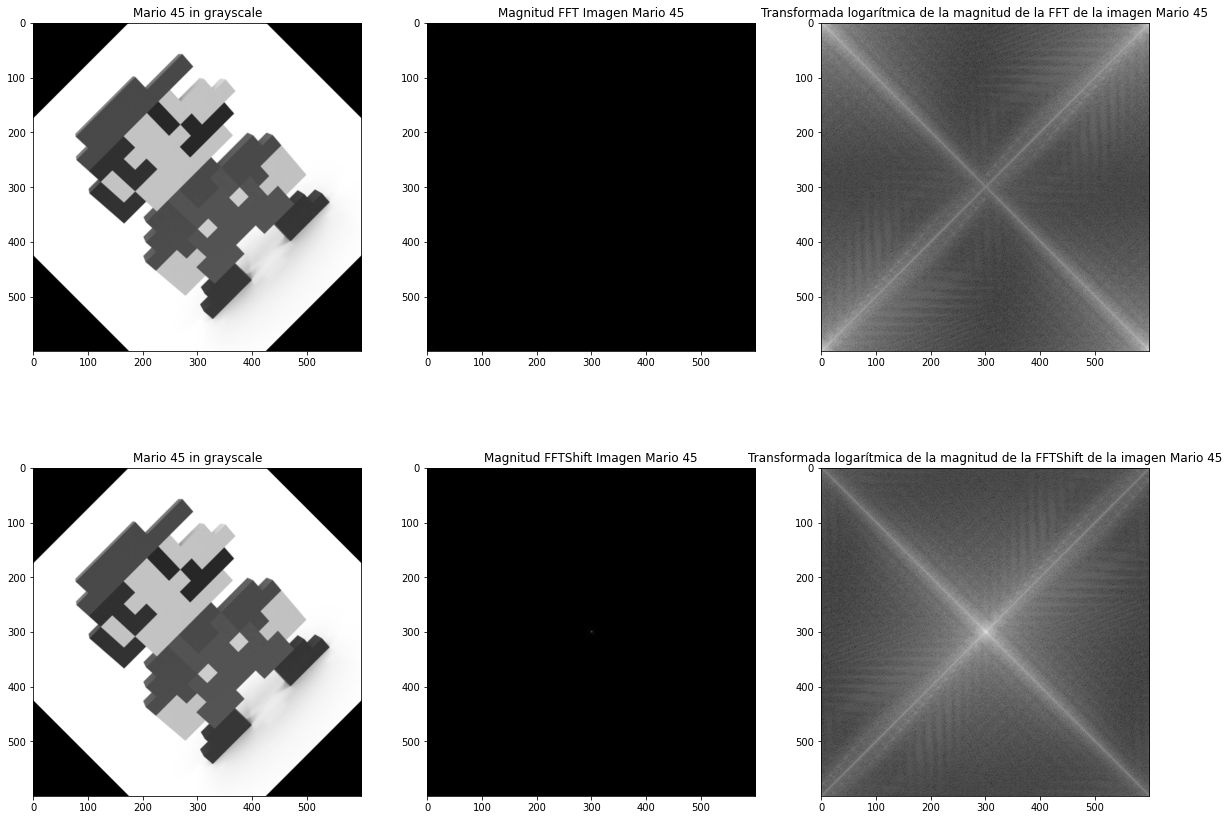

In [105]:
def rotate_image(image, angle):
  return imutils.rotate(image, angle)

mario_45 = rotate_image(gray_mario, 45)
mag_fft_mario45 = FFT(mario_45)
mag_fft_shift_mario45 = FFTShift(mario_45)

generate_plot(mario_45, mag_fft_mario45, mag_fft_shift_mario45, "Mario 45")

Observamos que el espectro de la imagen rotada aparece rotado en el mismo ángulo. Se vuelven a apreciar extremos con intensidades de frecuencia levemente superiores al centro.

Al centrar el espectro, se observa con mayor facilidad el fenómeno del aumento de intensidad de frecuencias bajas.

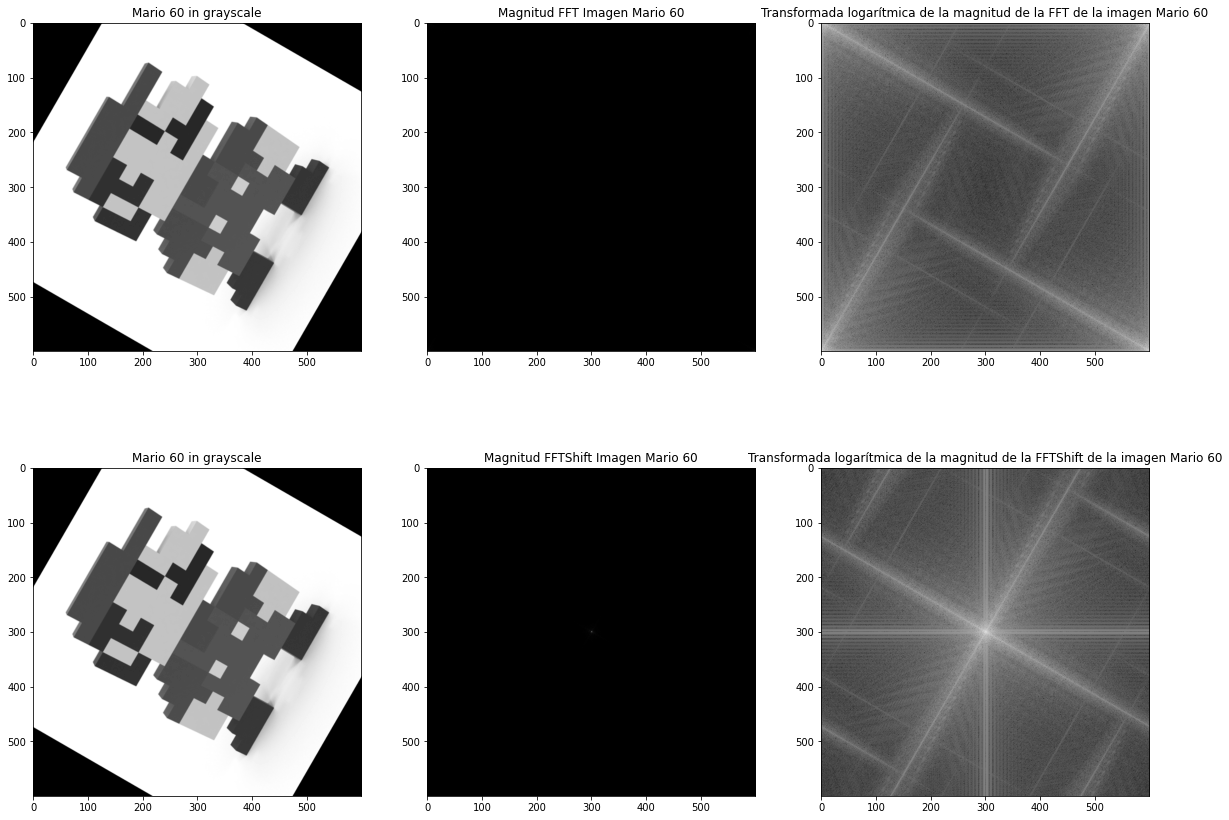

In [106]:
mario_60 = rotate_image(gray_mario, 60)
mag_fft_mario60 = FFT(mario_60)
mag_fft_shift_mario60 = FFTShift(mario_60)

generate_plot(mario_60, mag_fft_mario60, mag_fft_shift_mario60, "Mario 60")

Al aplicar una rotación en 60 grados, ademas de rotarse el espectro, aparecen nuevas intensidades de frecuencia. Esto se puede explicar con lo observado en la imagen original rotada, en la cual aparece un fondo negro para completar el espacio, con lo que se requieren frecuencias adicionales.

Al centrar el espectro, se nota con mayor facilidad el aumento de intensidad en las zonas de baja
frecuencia. Además, se pueden observar con mayor claridad además las frecuencias adicionales que aparecen en el
espectro.